In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
# import re
# from autocorrect import spell
import regex as re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Conv1D,MaxPooling1D
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.
data=pd.read_csv('/content/drug.com 2.csv')
data


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,5/20/2012,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,4/27/2010,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,12/14/2009,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,11/3/2015,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,11/27/2016,37
...,...,...,...,...,...,...,...
4212,84100,Ethinyl estradiol / norgestimate,Birth Control,"""This will be the 6th month I&#039;ve been on ...",5,4/9/2017,6
4213,146853,Alprazolam,Anxiety,"""I suffer from complicated grief and PTSD, I l...",8,1/8/2017,30
4214,124779,Omega-3 polyunsaturated fatty acids,Hypertriglyceridemia,"""I&#039;ve used Lovaza for about 8 months and ...",10,6/22/2008,140
4215,13778,Amphetamine / dextroamphetamine,ADHD,"""I used to take a high dosage time release tab...",9,10/29/2008,19


In [ ]:
review=pd.DataFrame(data.groupby('rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,rating,No of Users
0,10,1370
1,9,712
2,1,554
3,8,471
4,7,236


In [ ]:
permanent = data[['rating' , 'review' , 'condition' , 'uniqueID']]
mpermanent=permanent.dropna()
mpermanent.head()

,rating,review,condition,uniqueID
0,9,"""It has no side effect, I take it in combinati...",Left Ventricular Dysfunction,206461
1,8,"""My son is halfway through his fourth week of ...",ADHD,95260
2,5,"""I used to take another oral contraceptive, wh...",Birth Control,92703
3,8,"""This is my first time using any form of birth...",Birth Control,138000
4,9,"""Suboxone has completely turned my life around...",Opiate Dependence,35696


In [ ]:
check =  mpermanent[mpermanent["review"].isnull()]
check.head()

,rating,review,condition,uniqueID


In [ ]:
actualrating = mpermanent[(mpermanent['rating'] == 1) | (mpermanent['rating'] == 10)]
actualrating.shape


(1913, 4)

In [ ]:
y = actualrating['rating']
x = actualrating['review'].reset_index()
len(y)
X = x['review']
print(X)

0       "He pulled out, but he cummed a bit in me. I t...
1       "Abilify changed my life. There is hope. I was...
2       " I Ve had  nothing but problems with the Kepp...
3       "I have taken anti-depressants for years, with...
4       "I&#039;ve been on every medicine under the su...
                              ...                        
1908    "I&#039;m a 24 y/o female that had been dealin...
1909    "Have been on this for four weeks.  First two ...
1910    "I&#039;ve tried the patch, the shot, Ortho Cy...
1911    "Didn&#039;t improve any symptoms.\r\n\r\nSide...
1912    "I&#039;ve used Lovaza for about 8 months and ...
Name: review, Length: 1913, dtype: object


In [ ]:
import string
from nltk.corpus import stopwords
# stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

tokens = X[0].split()
print(tokens)

['"He', 'pulled', 'out,', 'but', 'he', 'cummed', 'a', 'bit', 'in', 'me.', 'I', 'took', 'the', 'Plan', 'B', '26', 'hours', 'later,', 'and', 'took', 'a', 'pregnancy', 'test', 'two', 'weeks', 'later', '-', '-', 'I&#039;m', 'pregnant."']


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import string

# Assuming you have a DataFrame with a column named 'text' and a column named 'target'
# Replace it with your actual column names if they are different
data = pd.read_csv('/content/drug.com 2.csv')
X = data['review']
y = data['rating']

# Bag of Words (BoW) Transformation
vectorizer = CountVectorizer(analyzer='word')
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# The rest of your code for training and testing the model goes here
# ...

# The clean_text function
def clean_text(review):
    '''
    1. Remove punctuation
    2. Remove stopwords
    3. Return the cleaned text as a list of words
    '''
    if isinstance(review, csr_matrix):
        # Convert sparse matrix to dense array
        review = review.toarray()

    cleaned_text = []
    for doc in review:
        nopunc = [char for char in doc if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        cleaned_text.append(nopunc)

    return cleaned_text


In [ ]:
#from sklearn.naive_bayes import MultinomialNB
#nb = MultinomialNB()
#nan_indices = np.isnan(y)
#nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#preds = nb.predict(X_test)
#from sklearn.metrics import confusion_matrix, classification_report
#print(confusion_matrix(y_test, preds))
#print('\n')
#print(classification_report(y_test, preds))
#nb.score(X_train, y_train)

[[ 45   0   0   0   0   0   0   2   5 112]
 [  8   0   0   0   0   0   0   1   6  36]
 [  5   0   0   0   0   0   0   0   6  41]
 [  5   0   0   0   0   0   0   1   6  34]
 [  2   0   0   0   0   0   0   2  10  50]
 [  2   0   0   0   1   0   0   1   6  35]
 [  3   1   0   0   0   0   0   0   8  54]
 [  2   0   0   0   0   0   0   2  17 136]
 [  0   0   0   0   0   0   0   5  14 203]
 [ 10   0   0   0   0   0   1   2  22 364]]


              precision    recall  f1-score   support

           1       0.55      0.27      0.37       164
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        52
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        66
           8       0.12      0.01      0.02       157
           9       0.14      0.06      0.09       222
          10       0.34   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5682819383259912

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
predsvm=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[ 45   0   0   0   0   0   0   2   5 112]
 [  8   0   0   0   0   0   0   1   6  36]
 [  5   0   0   0   0   0   0   0   6  41]
 [  5   0   0   0   0   0   0   1   6  34]
 [  2   0   0   0   0   0   0   2  10  50]
 [  2   0   0   0   1   0   0   1   6  35]
 [  3   1   0   0   0   0   0   0   8  54]
 [  2   0   0   0   0   0   0   2  17 136]
 [  0   0   0   0   0   0   0   5  14 203]
 [ 10   0   0   0   0   0   1   2  22 364]]


              precision    recall  f1-score   support

           1       0.51      0.16      0.24       164
           2       1.00      0.02      0.04        51
           3       1.00      0.02      0.04        52
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00       157
           9       0.17      0.00      0.01       222
          10       0.32   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5520162656726534

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predsknn=neigh.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_train,y_train)

[[139   1   1   2   0   0   1   1   3  16]
 [ 20  27   0   0   0   0   0   1   0   3]
 [ 14   6  26   2   1   0   0   0   0   3]
 [ 14   4   2  18   0   0   0   1   4   3]
 [ 16   8   5   9  21   0   0   0   0   5]
 [ 13   3   4   1   1  17   0   0   0   6]
 [ 20   7   4   4   1   5  20   0   0   5]
 [ 30  11   8   8   8   5  10  55   9  13]
 [ 49  10   9  19   4   7  13  10  66  35]
 [ 60  21  11  17   0   5   7  10   9 259]]


              precision    recall  f1-score   support

           1       0.37      0.85      0.52       164
           2       0.28      0.53      0.36        51
           3       0.37      0.50      0.43        52
           4       0.23      0.39      0.29        46
           5       0.58      0.33      0.42        64
           6       0.44      0.38      0.40        45
           7       0.39      0.30      0.34        66
           8       0.71      0.35      0.47       157
           9       0.73      0.30      0.42       222
          10       0.74   

0.5028803795323619

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

[[ 51   0   0   1   2   1   0   5  21  83]
 [  9   1   0   0   1   0   4   1  10  25]
 [  8   0   1   1   0   1   0   5  10  26]
 [  7   0   0   0   0   2   1   4  10  22]
 [  8   0   0   0   1   1   1   0  16  37]
 [  4   0   0   0   0   1   1   2   9  28]
 [  6   1   0   0   1   1   0  10  11  36]
 [  9   1   0   0   1   1   3  21  21 100]
 [ 17   1   0   1   2   2   5  15  31 148]
 [ 34   1   0   1   4   3  11  16  32 297]]


              precision    recall  f1-score   support

           1       0.33      0.31      0.32       164
           2       0.20      0.02      0.04        51
           3       1.00      0.02      0.04        52
           4       0.00      0.00      0.00        46
           5       0.08      0.02      0.03        64
           6       0.08      0.02      0.03        45
           7       0.00      0.00      0.00        66
           8       0.27      0.13      0.18       157
           9       0.18      0.14      0.16       222
          10       0.37   

0.5008471704506947

In [ ]:
positive_review = actualrating['review'].iloc[2]
positive_review

'" I Ve had  nothing but problems with the Keppera : constant shaking in my arms &amp; legs &amp; pins &amp; needles feeling in my arms &amp; legs severe light headedness no appetite &amp; etc."'

In [ ]:
positive_review_transformed = vectorizer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

1

In [ ]:
positive_review = actualrating['review'].iloc[11]
positive_review

'"I am 30 years old. I had a multiple composite spinal injuries 15 years ago. The aches and pains unbearable. I started taking anti-inflammatories about 2 years ago. I started getting injections every month of Toradol and &quot;Depo&quot; something. I am almost off all pain meds I mean I still have bad days but I can function again."'

In [ ]:
positive_review_transformed = vectorizer.transform([positive_review])
model.predict(positive_review_transformed)[0]

10

In [ ]:
negative_review = mpermanent['review'].iloc[1035]
print(negative_review)


"I had been medication free for over 10 years when a series of traumatic events escalated in full blown psychosis and deep depression. I was suicidal, unable to sleep and experiencing 6 hour long panic attacks. I was put on olanzapine 5mg at night and have been taking it for just over 1 year. I was able to sleep through and the nightmarish world I inhabited slowly began to clear like a thick fog. At the time I thought there was no way I would make it out alive! The deep depression took longer to lift and after no luck combining it with proxac or citalopram I hit on the right combination with Effexor 225mg. Still, the Olanzapine was my &#039;daylight&#039; drug. Weight gain has been an issue but my appetite is more manageable now and am exercising."


In [ ]:
negative_review_transformed = vectorizer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

8

In [ ]:
negative_review_transformed = vectorizer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

6

In [ ]:
mpermanent['label'] = ['1' if star >= 7 else '0' for star in mpermanent['rating']];

<ipython-input-41-7cc847841be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpermanent['label'] = ['1' if star >= 7 else '0' for star in mpermanent['rating']];


In [ ]:
mpermanent

,rating,review,condition,uniqueID,label
0,9,"""It has no side effect, I take it in combinati...",Left Ventricular Dysfunction,206461,1
1,8,"""My son is halfway through his fourth week of ...",ADHD,95260,1
2,5,"""I used to take another oral contraceptive, wh...",Birth Control,92703,0
3,8,"""This is my first time using any form of birth...",Birth Control,138000,1
4,9,"""Suboxone has completely turned my life around...",Opiate Dependence,35696,1
...,...,...,...,...,...
4212,5,"""This will be the 6th month I&#039;ve been on ...",Birth Control,84100,0
4213,8,"""I suffer from complicated grief and PTSD, I l...",Anxiety,146853,1
4214,10,"""I&#039;ve used Lovaza for about 8 months and ...",Hypertriglyceridemia,124779,1
4215,9,"""I used to take a high dosage time release tab...",ADHD,13778,1


In [ ]:
reviews = mpermanent['review']
labels = mpermanent['label']
print(len(reviews))
print(len(labels))
reviews[3]

4194
4194


'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [ ]:
stop = set(stopwords.words('english'))
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [ ]:
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [ ]:
print(sentences[7])
print(reviews[7])
reviews.shape

abilify changed life hope zoloft clonidine first started abilify age zoloft depression clondine manage complete rage moods control depressed hopeless one second mean irrational full rage next prescribed 2mg abilify point feel like cured though know polar disorder constant battle know abilify works tried get lost complete control emotions went back golden 5mg daily better ever past side effect like eat lot
"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and 

(4194,)

In [ ]:
#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

<ipython-input-48-9263946c92e7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_sequences = np.array(tokenizer.texts_to_sequences(sentences))


In [ ]:
print(text_sequences)
print(sequence_dict)
print(word_dict)

[list([2, 99, 11, 710, 3774, 2924, 1063])
 list([394, 3304, 1474, 20, 2438, 284, 1200, 228, 65, 20, 9, 3, 1912, 62, 41, 10, 78, 711, 12, 233, 2925, 615, 542, 58, 189, 328, 389, 1913, 3305, 390, 24, 1101, 124, 158, 789, 10, 101, 389, 70, 124, 65, 41, 10, 191, 243, 36, 4555, 83, 140, 395, 51, 132, 140, 2925, 2075, 164, 281, 1914, 40, 55, 122, 133, 303, 84, 213])
 list([67, 11, 143, 827, 1693, 18, 484, 147, 168, 80, 1475, 10, 2, 6, 6083, 1201, 6084, 1102, 195, 3306, 2926, 853, 112, 400, 9, 3306, 275, 5, 1, 21, 2076, 158, 21, 292, 41, 22, 3, 159, 313, 41, 22, 365, 313, 164, 29, 49, 102, 365, 21, 292, 41, 22, 314, 365, 20, 32, 145, 877, 878, 373, 2, 2, 6, 927, 21, 243, 6085, 6086])
 ...
 list([67, 10745, 8, 3014, 391, 2382, 1569, 211, 3014, 64, 83, 56, 67, 29, 2382, 325, 24, 68, 10746, 37, 8, 739, 924, 1262])
 list([67, 11, 211, 258, 13, 1210, 788, 143, 64, 23, 352, 115, 15, 10747, 333, 2781, 21, 296, 113, 2525, 669, 74, 773, 773, 101, 21, 36, 731, 773, 10748, 757, 140, 2689, 3443, 3197, 2,

In [ ]:
reviews_encoded = []
default_value=0
for i,review in enumerate(review_cleans):
  encoded_review =[sequence_dict.get(x, default_value) for x in review]

reviews_encoded.append(encoded_review)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

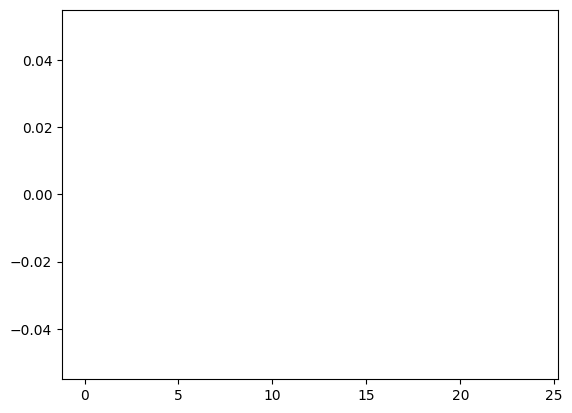

In [ ]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [ ]:
if len(reviews_encoded) > 135:
    print(reviews_encoded[135])
else:
    print("Index 135 is out of range for the reviews_encoded list.")


Index 135 is out of range for the reviews_encoded list.


In [ ]:
if len(reviews_encoded) > 135:
    print(reviews_encoded[135])
else:
    print("Index 135 is out of range for the reviews_encoded list.")


Index 135 is out of range for the reviews_encoded list.


In [ ]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [ ]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [ ]:
X = X[random_posits];
Y = Y[random_posits];
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Assuming you have X_train, Y_train, X_dev, Y_dev, X_test1, Y_test1
# Replace these with your actual data

# Placeholder data (replace with your actual data)
X_train = np.random.rand(100, 10, 1)  # Example: 100 samples, 10 time steps, 1 feature
Y_train = np.random.randint(2, size=(100, 1))  # Binary labels (0 or 1)

X_dev = np.random.rand(20, 10, 1)  # Example: 20 samples, 10 time steps, 1 feature
Y_dev = np.random.randint(2, size=(20, 1))  # Binary labels (0 or 1)

X_test1 = np.random.rand(30, 10, 1)  # Example: 30 samples, 10 time steps, 1 feature
Y_test1 = np.random.randint(2, size=(30, 1))  # Binary labels (0 or 1)

# Model architecture (replace with your actual model)
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(10, 1)))  # Adjust input_shape based on your time steps and features
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split data for training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# Fit model and run it for 5 epochs
model.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_val, Y_val))

# Evaluate on test data
score = model.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1] * 100))


Epoch 1/5
5/5 [==============================] - 3s 83ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.4000
Epoch 2/5
5/5 [==============================] - 0s 27ms/step - loss: 0.6898 - accuracy: 0.5714 - val_loss: 0.7024 - val_accuracy: 0.4000
Epoch 3/5
5/5 [==============================] - 0s 27ms/step - loss: 0.6881 - accuracy: 0.5714 - val_loss: 0.7096 - val_accuracy: 0.4000
Epoch 4/5
5/5 [==============================] - 0s 28ms/step - loss: 0.6869 - accuracy: 0.5714 - val_loss: 0.7160 - val_accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 0.6727 - accuracy: 0.6333
Test accuracy: 63.3333%
